<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_Exercise_Session_1_ANN_Pytorch_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train ANN through Customer Churn data with 1 and 2 hidden layers!

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/customer_churn_data.csv')

In [30]:
data.head()

,customerID,gender_encod,SeniorCitizen,MonthlyCharges,TotalCharges,churn_encod
0,7590-VHVEG,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,56.95,1889.50,0
2,3668-QPYBK,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,42.30,1840.75,0
4,9237-HQITU,0,0,70.70,151.65,1


In [31]:
data.shape

(7032, 6)

In [34]:
# Scaling
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges']])
data_s = pd.DataFrame(data_scaled, columns=['MonthlyCharges', 'TotalCharges'])

In [36]:
data.columns

Index(['customerID', 'gender_encod', 'SeniorCitizen', 'MonthlyCharges',
       'TotalCharges', 'churn_encod'],
      dtype='object')

In [39]:
data_s_all = pd.concat([data[['customerID', 'gender_encod', 'SeniorCitizen', 'churn_encod']], data_s], axis=1)
data_s_all

,customerID,gender_encod,SeniorCitizen,churn_encod,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,0,0.115423,0.001275
1,5575-GNVDE,1,0,0,0.385075,0.215867
2,3668-QPYBK,1,0,1,0.354229,0.010310
3,7795-CFOCW,1,0,0,0.239303,0.210241
4,9237-HQITU,0,0,1,0.521891,0.015330
...,...,...,...,...,...,...
7027,6840-RESVB,1,0,0,0.662189,0.227521
7028,2234-XADUH,0,0,0,0.845274,0.847461
7029,4801-JZAZL,0,0,0,0.112935,0.037809
7030,8361-LTMKD,1,1,1,0.558706,0.033210


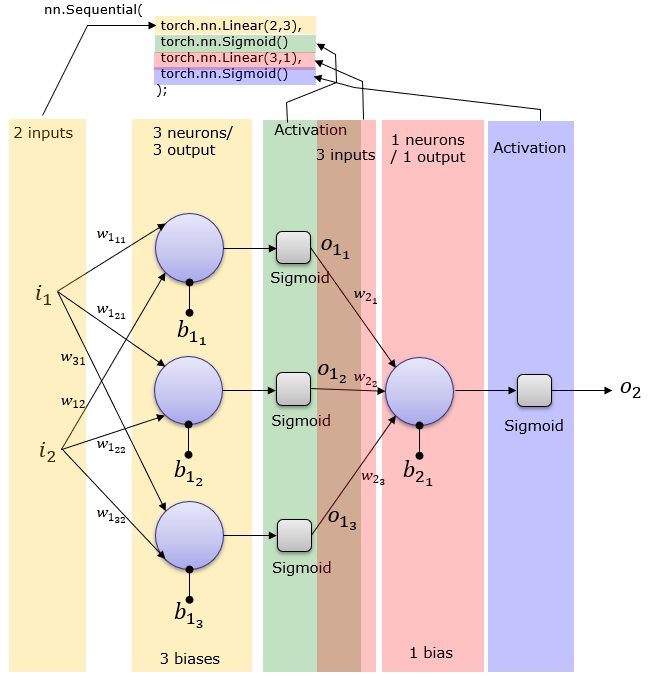

In [40]:
data_x = torch.tensor(data_s_all[['gender_encod', 'SeniorCitizen']].values.astype(np.float32))
data_y = torch.tensor(data_s_all[['churn_encod']].values.astype(np.float32))

In [41]:
print(data_x.size())
print(data_y.size())

torch.Size([7032, 2])
torch.Size([7032, 1])


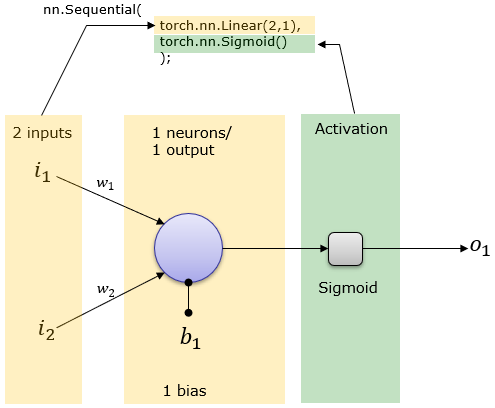

## 5. Training ANN through Customer churn dataset with 2 inputs

In [42]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 10
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net3 = torch.nn.Sequential(torch.nn.Linear(2,1),
                                 torch.nn.Sigmoid());
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net3.parameters(), lr=learning_rate)

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net3.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-42-27edbc55cf72>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.20103104412555695
Loss: 0.19181089103221893
Loss: 0.19109152257442474
Loss: 0.19094182550907135
Loss: 0.19090662896633148
Loss: 0.19089706242084503
Loss: 0.19089403748512268
Loss: 0.19089286029338837
Loss: 0.19089238345623016
Loss: 0.19089214503765106


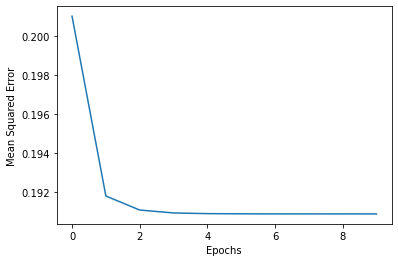

In [43]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

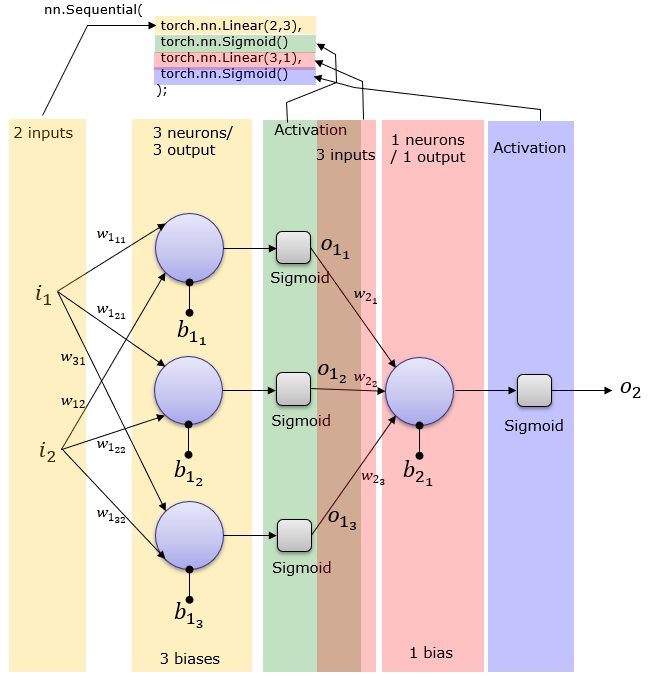

## 5. Training ANN through Customer churn dataset with 2 inputs and 1 hidden layer

In [45]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 10
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(torch.nn.Linear(2,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Sigmoid()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-45-a2c277292e44>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.19433465600013733
Loss: 0.1911211460828781
Loss: 0.19110320508480072
Loss: 0.19109676778316498
Loss: 0.1910945475101471
Loss: 0.1910940259695053
Loss: 0.19109362363815308
Loss: 0.19109299778938293
Loss: 0.19109191000461578
Loss: 0.19109219312667847


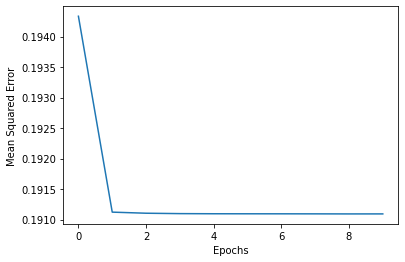

In [46]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [47]:
data_x_4 = torch.tensor(data_s_all[['gender_encod', 'SeniorCitizen', 'TotalCharges', 'MonthlyCharges']].values.astype(np.float32))
data_y_4 = torch.tensor(data_s_all[['churn_encod']].values.astype(np.float32))


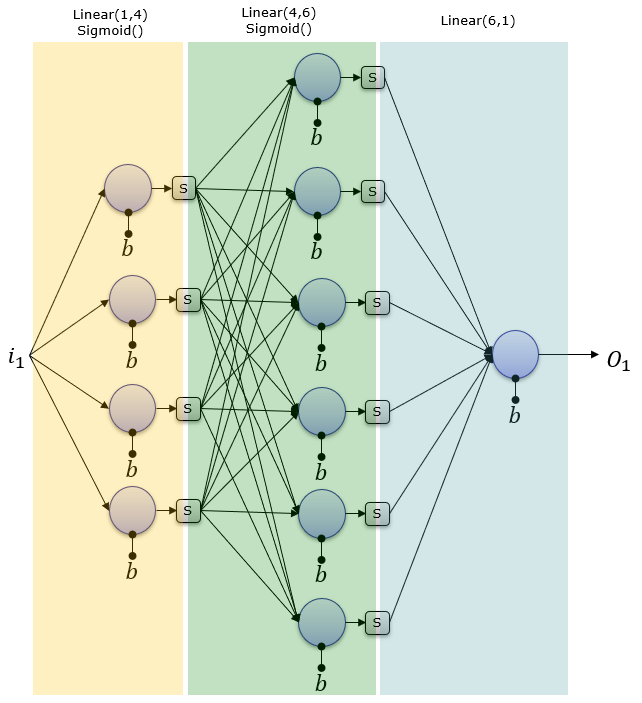

## 5. Training ANN through Customer churn dataset with 4 inputs and 2 hidden layers

In [48]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()
epochs = 50
learning_rate = 0.01
loss_set = {}



for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x_4, data_y_4):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-48-b4c3595d720a>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.17684872448444366
Loss: 0.14821091294288635
Loss: 0.14579467475414276
Loss: 0.14502762258052826
Loss: 0.14502015709877014
Loss: 0.1448017656803131
Loss: 0.14461550116539001
Loss: 0.14459128677845
Loss: 0.14459994435310364
Loss: 0.14458820223808289


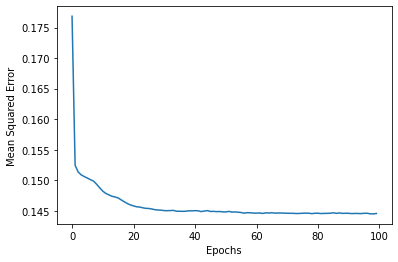

In [49]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [69]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()
epochs = 100
learning_rate = 0.01
loss_set = {}

for epoch in range(100):
    y = model_net5(data_x_4)
    # 2. FeedForward Evaluation
    loss = loss_mse(y,data_y_4)
    optimizer.zero_grad()
    # 3. Backward / Gradient Calculation
    loss.backward()
    # 4. Back Propagation
    optimizer.step()

    loss_set[epoch] = loss.detach().numpy()
    #display_loss
    print('epoch = ',epoch, ',' , 'loss = ',loss.item())

epoch =  0 , loss =  0.23455041646957397
epoch =  1 , loss =  0.21842482686042786
epoch =  2 , loss =  0.2124602496623993
epoch =  3 , loss =  0.20503021776676178
epoch =  4 , loss =  0.19778040051460266
epoch =  5 , loss =  0.1932133138179779
epoch =  6 , loss =  0.19062691926956177
epoch =  7 , loss =  0.1886196881532669
epoch =  8 , loss =  0.18643464148044586
epoch =  9 , loss =  0.18345512449741364
epoch =  10 , loss =  0.18095093965530396
epoch =  11 , loss =  0.17878621816635132
epoch =  12 , loss =  0.17654180526733398
epoch =  13 , loss =  0.17401915788650513
epoch =  14 , loss =  0.1711103618144989
epoch =  15 , loss =  0.16861630976200104
epoch =  16 , loss =  0.1721811294555664
epoch =  17 , loss =  0.1709006130695343
epoch =  18 , loss =  0.16233360767364502
epoch =  19 , loss =  0.15969645977020264
epoch =  20 , loss =  0.157529816031456
epoch =  21 , loss =  0.15618090331554413
epoch =  22 , loss =  0.15568678081035614
epoch =  23 , loss =  0.15697060525417328
epoch =  2

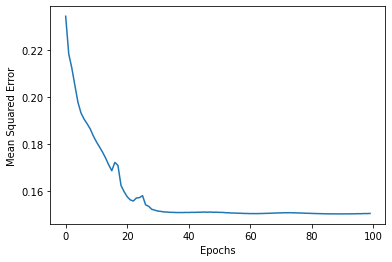

In [71]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()